## Imports

In [1]:
%matplotlib inline

import os
import certifi
import arcpy

# set default gdal and ertifi envs (non-dev)
try:
    install_dir = arcpy.GetInstallInfo().get('InstallDir')  # get arcgis install dir
    os.environ['GDAL_DATA'] = os.path.join(install_dir, 'Resources\pedata\gdaldata')  # join to gdal install
    os.environ.setdefault("CURL_CA_BUNDLE", certifi.where())  # set certifi
except:
    arcpy.AddError('Could not get install directory for ArcGIS Pro or set certifi.')
    raise
    
# globals (dev)
FOLDER_MODULES = r'C:\Users\Lewis\Documents\GitHub\tenement-tools\modules'  
FOLDER_SHARED = r'C:\Users\Lewis\Documents\GitHub\tenement-tools\shared'
GRP_LYR_FILE = r"C:\Users\Lewis\Documents\GitHub\tenement-tools\arc\lyr\group_template.lyrx"

# set gdal global environ
import os
os.environ['GDAL_DISABLE_READDIR_ON_OPEN'] = 'EMPTY_DIR'
os.environ['CPL_VSIL_CURL_ALLOWED_EXTENSIONS '] = 'tif'
os.environ['VSI_CACHE '] = 'TRUE'
os.environ['GDAL_HTTP_MULTIRANGE '] = 'YES'
os.environ['GDAL_HTTP_MERGE_CONSECUTIVE_RANGES '] = 'YES'

# also set rasterio env variables
rasterio_env = {
    'GDAL_DISABLE_READDIR_ON_OPEN': 'EMPTY_DIR',
    'CPL_VSIL_CURL_ALLOWED_EXTENSIONS': 'tif',
    'VSI_CACHE': True,
    'GDAL_HTTP_MULTIRANGE': 'YES',
    'GDAL_HTTP_MERGE_CONSECUTIVE_RANGES': 'YES'
}

# disable future warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# safe imports
import sys                  # arcgis comes with these
import datetime                 # arcgis comes with these
import numpy as np              # arcgis comes with these
import arcpy                    # arcgis comes with these
import matplotlib.pyplot as plt
from datetime import datetime   # arcgis comes with these

# risky imports (not native to arcgis)
try:
    from osgeo import gdal
    from osgeo import ogr
    from osgeo import osr
    import tempfile
    import xarray as xr
    import dask
    import rasterio
    import pystac_client
    from odc import stac
except:
    arcpy.AddError('Python libraries xarray, dask, rasterio, pystac, or odc not installed.')
    raise

# import tools
try:
    # shared folder
    sys.path.append(FOLDER_SHARED)
    import arc, satfetcher, tools

    # module folder
    sys.path.append(FOLDER_MODULES)
    import nrt, cog_odc, cog
except:
    arcpy.AddError('Could not find tenement tools python scripts (modules, shared).')
    raise

In [2]:
from importlib import reload
reload(nrt)

<module 'nrt' from 'C:\\Users\\Lewis\\Documents\\GitHub\\tenement-tools\\modules\\nrt.py'>

## Create monitoring project

In [9]:
# user creates monitoring projects. includes gdb and folders for project structure

## Create monitoring areas

In [4]:
# user creates monitoring polygons and fills in info in each row of table

## NRT data Testing

In [6]:
# disable future warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=RuntimeWarning)
warnings.simplefilter(action='ignore', category=UserWarning)
warnings.simplefilter(action='ignore', category=dask.array.core.PerformanceWarning)

# all provisional + non-provisional landsat
out_nc = r"C:\Users\Lewis\Desktop\nrt_projects\ophthalmia_project_cubes\cube_A01.nc"
s_year = '{}-01-01'.format(1990)
e_year = '{}-12-31'.format(datetime.now().year)
bbox = [119.85685826326254, -23.31510503211872, 119.85838607621004, -23.31250952051907]
in_epsg = 3577

# get params
params = nrt.get_satellite_params(platform='Landsat')

# open existing cube
ds_existing = xr.open_dataset(r"C:\Users\Lewis\Desktop\nrt_projects\ophthalmia_project_cubes\cube_A01.nc")

# sync cube to now
ds_ls = nrt.sync_nrt_cube(out_nc=out_nc,
                          collections=params.get('collections'),
                          bands=params.get('bands'),
                          start_dt=s_year,
                          end_dt=e_year,
                          bbox=bbox,
                          in_epsg=in_epsg,
                          slc_off=False,
                          resolution=params.get('resolution'),
                          ds_existing=None,
                          chunks={})

OSError: [Errno -90] NetCDF: file not found: b'C:\\Users\\Lewis\\Desktop\\nrt_projects\\ophthalmia_project_cubes\\cube_A01.nc'

In [ ]:
# disable future warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=RuntimeWarning)
warnings.simplefilter(action='ignore', category=UserWarning)
warnings.simplefilter(action='ignore', category=dask.array.core.PerformanceWarning)

# all provisional + non-provisional landsat
out_nc = r"C:\Users\Lewis\Desktop\nrt_projects\ophthalmia_project_cubes\cube_A01.nc"
s_year = '{}-01-01'.format(1990)
e_year = '{}-12-31'.format(datetime.now().year)
bbox = [119.85685826326254, -23.31510503211872, 119.85838607621004, -23.31250952051907]
in_epsg = 3577

# get params
params = nrt.get_satellite_params(platform='Sentinel')

# open existing cube
ds_existing = xr.open_dataset(r"C:\Users\Lewis\Desktop\nrt_projects\ophthalmia_project_cubes\cube_A01.nc")

# sync cube to now
ds_s2 = nrt.sync_nrt_cube(out_nc=out_nc,
                          collections=params.get('collections'),
                          bands=params.get('bands'),
                          start_dt=s_year,
                          end_dt=e_year,
                          bbox=bbox,
                          in_epsg=in_epsg,
                          slc_off=False,
                          resolution=params.get('resolution'),
                          ds_existing=None,
                          chunks={})

## Monitor simulation

### Load raw vege, smooth, veg, raw change time series

In [3]:
ds_change = xr.open_dataset(r"C:\Users\Lewis\Desktop\test_change\change_A01.nc")  # big impact 2007 ophtha dam area
#ds_change = xr.open_dataset(r"C:\Users\Lewis\Desktop\test_change\change_A02.nc")  # big impact 2007 ophtha dam area, but training done 2013, so recovery is shown
#ds_change = xr.open_dataset(r"C:\Users\Lewis\Desktop\test_change\change_A03.nc")  # near impact 2007 ophtha dam area, less impact in 2007
#ds_change = xr.open_dataset(r"C:\Users\Lewis\Desktop\test_change\change_A04.nc")  # open shrubland with wo euc? training period bad
#ds_change = xr.open_dataset(r"C:\Users\Lewis\Desktop\test_change\change_A05.nc")  # mulga area on road side? training period bad
#ds_change = xr.open_dataset(r"C:\Users\Lewis\Desktop\test_change\change_A06.nc")  # euc vic east yandi. gradual increasing... odd result? try train period
#ds_change = xr.open_dataset(r"C:\Users\Lewis\Desktop\test_change\change_A07.nc")  # yandi discharge south veg... good, but change in training period?
#ds_change = xr.open_dataset(r"C:\Users\Lewis\Desktop\test_change\change_A08.nc")   # yandi elephatn graveyard. good - 2007 decline

vec_summary = ds_change['summary'].median(['x', 'y']).data
fig = plt.figure(figsize=(15, 4))
plt.plot(vec_summary, color='green')
plt.show()

vec_static = ds_change['static'].median(['x', 'y']).data
fig = plt.figure(figsize=(15, 4))
plt.plot(vec_static, color='blue')
plt.show()

vec_static_smooth = nrt.smooth_change(arr=vec_static)       
fig = plt.figure(figsize=(15, 4))
plt.plot(vec_static, color='blue')
plt.plot(vec_static_smooth, color='red')
plt.show()

OSError: [Errno -90] NetCDF: file not found: b'C:\\Users\\Lewis\\Desktop\\test_change\\change_A01.nc'

## Apply rule 1: consequtives

In [ ]:
min_consequtives = 3
max_consequtives = 5
inc_plateaus_in_runs = True

# get inc, dec and stable counts
vec_rule_1 = nrt.apply_rule_one(arr=vec_static_smooth, 
                                direction='decline', 
                                min_consequtives=3, 
                                max_consequtives=None,
                                inc_plateaus=False)

fig = plt.figure(figsize=(15, 4))
plt.plot(vec_static_smooth, color='darkblue', marker='o', alpha=0.25)
plt.plot(np.where(vec_rule_1 >= 1, vec_static_smooth, np.nan), color='red', marker='o', alpha=0.25)
plt.show()

## Apply rule 2: threshold

In [ ]:
vec_rule_2 = nrt.apply_rule_two(vec_static_smooth, direction='decline', min_stdv=1, operator='<=')
#vec_rule_2_incline = apply_rule_two(yest, min_zone=1, operator='>=')

fig = plt.figure(figsize=(15, 4))
plt.plot(vec_static_smooth, color='darkblue', marker='o', alpha=0.25)
plt.plot(vec_rule_2, color='red', marker='o', alpha=0.25)
plt.show()

## Apply rule 3: jumps

In [ ]:
# temp - just testing
spiked = vec_static_smooth.copy()
#spiked[-10: -5] = spiked[-10: -5] - 8
#spiked[25: 30] = spiked[25: 30] - 4

# get num zones to jump
num_stdvs = nrt.get_stdv_from_zone(num_zones=1)

vec_rule_3 = nrt.apply_rule_three(spiked, direction='decline', num_stdv_jumped=num_stdvs, min_consequtives=3)
# #spike_inc = apply_rule_three(spiked, jump_direction='increase', jump_size=1, min_consequtives=3)

fig = plt.figure(figsize=(15, 4))
plt.plot(spiked, color='darkblue', marker='o', alpha=0.25)
plt.plot(np.where(vec_rule_3 >= 1, spiked, np.nan), color='red', marker='o', alpha=0.25)
plt.show()

## Apply rules 1, 2, 3: combined

In [ ]:
vec_rules_combo = nrt.apply_rule_combo(arr_r1=vec_rule_1, 
                                       arr_r2=vec_rule_2, 
                                       arr_r3=vec_rule_3, 
                                       ruleset='1&2|3')



fig = plt.figure(figsize=(15, 4))
plt.plot(spiked, color='darkblue', marker='o', alpha=0.25)
plt.plot(np.where(vec_rules_combo >= 1, spiked, np.nan), color='red', marker='o', alpha=0.25)
plt.show()

## Assign zone to rule output

In [ ]:
# classify smoothed array into zone 0
vec_temp = np.abs(vec_static_smooth)

# zone 0 - from 0 to 1 (+/-)
zone_0 = np.where((vec_temp >= 0) & (vec_temp <= 1), 0, 0)

# zone 1 - between 1 and 3 (+/-)
zone_1 = np.where((vec_temp > 1) & (vec_temp <= 3), 1, 0)

# zone 2 - between 3 and 5 (+/-)
zone_2 = np.where((vec_temp > 3) & (vec_temp <= 5), 2, 0)

# zone 3 - between 5 and 7 (+/-)
zone_3 = np.where((vec_temp > 5) & (vec_temp <= 7), 3, 0)

# zone 4 - between 7 and 9 (+/-)
zone_4 = np.where((vec_temp > 7) & (vec_temp <= 9), 4, 0)

# zone 5 - between 9 and 11 (+/-)
zone_5 = np.where((vec_temp > 9) & (vec_temp <= 11), 5, 0)

# zone 6 - between 11 and 13 (+/-)
zone_6 = np.where((vec_temp > 11) & (vec_temp <= 13), 6, 0)

# zone 7 - between 13 and 15 (+/-)
zone_7 = np.where((vec_temp > 13) & (vec_temp <= 15), 7, 0)

# zone 8 - between 15 and 17 (+/-)
zone_8 = np.where((vec_temp > 15) & (vec_temp <= 17), 8, 0)

# zone 9 - between 17 and 19 (+/-)
zone_9 = np.where((vec_temp > 17) & (vec_temp <= 19), 9, 0)

# zone 10 - above 19 (+/-)
zone_10 = np.where(vec_temp > 19, 10, 0)

In [ ]:
# simulate input
arr = vec_static_smooth.copy()

# set up zone ranges (stdvs)
zones = [
    [0, 1],    # zone 1 - from 0 to 1 (+/-)
    [1, 3],    # zone 2 - between 1 and 3 (+/-)
    [3, 5],    # zone 3 - between 3 and 5 (+/-)
    [5, 7],    # zone 4 - between 5 and 7 (+/-)
    [7, 9],    # zone 5 - between 7 and 9 (+/-)
    [9, 11],   # zone 6 - between 9 and 11 (+/-)
    [11, 13],  # zone 7 - between 11 and 13 (+/-)
    [13, 15],  # zone 8 - between 13 and 15 (+/-)
    [15, 17],  # zone 9 - between 15 and 17 (+/-)
    [17, 19],  # zone 10 - between 17 and 19 (+/-)
    [19]       # zone 11- above 19 (+/-)
]

# create template vector
vec_temp = np.full_like(arr, fill_value=np.nan)

# iter zones
for i, z in enumerate(zones, start=1):
    
    # 
    if i == 1:
        vec_temp[np.where((arr >= z[0]) & (arr <= z[1]))] = i
        vec_temp[np.where((arr < z[0]) & (arr >= z[1] * -1))] = i * -1
            
    elif i == 11:       
        vec_temp[np.where(arr > z[0])] = i
        vec_temp[np.where(arr < z[0] * -1)] = i * -1
        
    else:
        vec_temp[np.where((arr > z[0]) & (arr <= z[1]))] = i
        vec_temp[np.where((arr < z[0] * -1) & (arr >= z[1] * -1))] = i * -1
        
        

In [ ]:
vec_temp

In [ ]:
# dont forget, you need second last image when alerting and displaying data

In [ ]:
def classify_flag(arr):
    # classify smoothed array into zone 0
    vec_temp = np.abs(vec_static_smooth)

    # zone 0 - from 0 to 1 (+/-)
    zone_0 = np.where((vec_temp >= 0) & (vec_temp <= 1), 0, 0)

    # zone 1 - between 1 and 3 (+/-)
    zone_1 = np.where((vec_temp > 1) & (vec_temp <= 3), 1, 0)

    # zone 2 - between 3 and 5 (+/-)
    zone_2 = np.where((vec_temp > 3) & (vec_temp <= 5), 2, 0)

    # zone 3 - between 5 and 7 (+/-)
    zone_3 = np.where((vec_temp > 5) & (vec_temp <= 7), 3, 0)

    # zone 4 - between 7 and 9 (+/-)
    zone_4 = np.where((vec_temp > 7) & (vec_temp <= 9), 4, 0)

    # zone 5 - between 9 and 11 (+/-)
    zone_5 = np.where((vec_temp > 9) & (vec_temp <= 11), 5, 0)

    # zone 6 - between 11 and 13 (+/-)
    zone_6 = np.where((vec_temp > 11) & (vec_temp <= 13), 6, 0)

    # zone 7 - between 13 and 15 (+/-)
    zone_7 = np.where((vec_temp > 13) & (vec_temp <= 15), 7, 0)

    # zone 8 - between 15 and 17 (+/-)
    zone_8 = np.where((vec_temp > 15) & (vec_temp <= 17), 8, 0)

    # zone 9 - between 17 and 19 (+/-)
    zone_9 = np.where((vec_temp > 17) & (vec_temp <= 19), 9, 0)

    # zone 10 - above 19 (+/-)
    zone_10 = np.where(vec_temp > 19, 10, 0)

In [ ]:
vec_temp_signed = vec_static_smooth.copy()
vec_temp_signed = np.where(np.sign(vec_temp_signed) == 0, 1, np.sign(vec_temp_signed))

## Main function

In [ ]:
# for i in np.arange(0, len(vec_rule_1_decline)):
#     if i > 3:
    
#         vec_smooth = vec_static_smooth[0:i]
#         vec_rule = vec_rule_1_decline[0:i]
        
#         alarm = False
#         if vec_rule[-2] >= 1:
#             alarm = True
            
#         fig = plt.figure(figsize=(15, 4))
#         plt.plot(vec_smooth, color='darkblue', marker='o', alpha=0.25)
        
#         if alarm: 
#             plt.axvline(i - 2, color='black', linestyle='dashed')
        
#         plt.show()
#         plt.close()

## Working

In [532]:
# TODOS
# might want soem checks to ensure > 5 years between start and end (ewmacd fails with too few years)
# try catch around ewmacd stuff
# sortby on 
# may want a data spike remover before change detection incase s2 jumps around
# supress this wanring - it will keep happening every fetch if you dont
#C:\Users\Lewis\AppData\Local\ESRI\conda\envs\arcgispro-py3-dev-odc\Lib\site-packages\odc\stac\_eo3.py:577: UserWarning: Missing asset with name: nbar_nir
  #warn(f"Missing asset with name: {band}")
#C:\Users\Lewis\AppData\Local\ESRI\conda\envs\arcgispro-py3-dev-odc\Lib\site-packages\odc\stac\_eo3.py:577: UserWarning: Missing asset with name: nbar_red
# also supress this warning - happening on area 3
#C:\Users\Lewis\Documents\GitHub\tenement-tools\modules\nrt.py:1404: RuntimeWarning: invalid value encountered in double_scalars
  #Rsquared = 1 - np.sum(np.square(Responses_keeps - fits)) / np.sum(np.square(Responses_keeps - np.sum(Responses_keeps) / len(Responses_keeps)))
# check area 3 - when 3 declines from 1 down to 0 (no change), dont warn?
# check area 3 - why are flags occuring in 0 when rule 2 is applied? shouldnt these only happen < -1 ?
# yeo, def bug with area 3 - conseqs dont appear to be working. investoigate.

In [ ]:
# set gdal global environ
import os
os.environ['GDAL_DISABLE_READDIR_ON_OPEN'] = 'EMPTY_DIR'
os.environ['CPL_VSIL_CURL_ALLOWED_EXTENSIONS '] = 'tif'
os.environ['VSI_CACHE '] = 'TRUE'
os.environ['GDAL_HTTP_MULTIRANGE '] = 'YES'
os.environ['GDAL_HTTP_MERGE_CONSECUTIVE_RANGES '] = 'YES'

# also set rasterio env variables
rasterio_env = {
    'GDAL_DISABLE_READDIR_ON_OPEN': 'EMPTY_DIR',
    'CPL_VSIL_CURL_ALLOWED_EXTENSIONS':'tif',
    'VSI_CACHE': True,
    'GDAL_HTTP_MULTIRANGE': 'YES',
    'GDAL_HTTP_MERGE_CONSECUTIVE_RANGES': 'YES'
}

# safe imports
import sys                      # arcgis comes with these
import shutil                   # arcgis comes with these
import datetime                 # arcgis comes with these
import numpy as np              # arcgis comes with these
import arcpy                    # arcgis comes with these
import tempfile                 # arcgis comes with these
from datetime import datetime   # arcgis comes with these

# risky imports (not native to arcgis)
try:
    import xarray as xr
    import dask
    import rasterio
    import pystac_client
    import osr
    import json
    from odc import stac
    from osgeo import gdal
    from osgeo import ogr
    from osgeo import osr
except:
    arcpy.AddError('Python libraries xarray, dask, rasterio, pystac, or odc not installed.')
    raise

# import tools
try:
    # shared folder
    sys.path.append(FOLDER_SHARED)
    import arc, satfetcher, tools

    # module folder
    sys.path.append(FOLDER_MODULES)
    import nrt, cog_odc, cog
except:
    arcpy.AddError('Could not find tenement tools python scripts (modules, shared).')
    raise
    
# disable future warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=RuntimeWarning)
warnings.simplefilter(action='ignore', category=UserWarning)
warnings.simplefilter(action='ignore', category=dask.array.core.PerformanceWarning)
    
# grab parameter values 
#in_feat = r"C:\Users\Lewis\Desktop\nrt_projects\ophthalmia.gdb\monitoring_areas"
in_feat = r"C:\Users\Lewis\Desktop\nrt_projects\ophthalmia_projects.gdb\monitoring_areas"
in_ongoing = False
in_time_interval = 24
#in_email_from = parameters[3].value                # email from 
#in_smtp_server = parameters[4].value               # email smtp server 
#in_smtp_port = parameters[5].value                 # email smtp port 
#in_smtp_username = parameters[6].value             # email smtp username 
#in_smtp_password = parameters[7].value             # email smtp password 


# # # # #
# notify user and set up progress bar
arcpy.AddMessage('Beginning NRT Monitoring of areas.')
arcpy.SetProgressor(type='step', 
                    message='Preparing parameters...',
                    min_range=0, max_range=20)

# check if time interval is > 0
#in_time_interval = in_time_interval * 60 * 60
#if in_time_interval <= 0:
    #arcpy.AddError('Time interval must be above 0 hours.')
    #raise


# # # # #
# notify and increment progress bar
arcpy.SetProgressorLabel('Preparing parameters...')
arcpy.SetProgressorPosition(1)

# do some checks
# todo!

# prepare features shapefile
shp_desc = arcpy.Describe(in_feat)
in_feat = os.path.join(shp_desc.path, shp_desc.name)


# # # # #
# notify and increment progress bar
arcpy.SetProgressorLabel('Validating monitoring areas...')
arcpy.SetProgressorPosition(2)

# validate monitoring area feature class
if not nrt.validate_monitoring_areas(in_feat):
    arcpy.AddError('Monitoring areas feature is invalid.')
    raise # return

# get input featureclass file, get dir and filename (validated by now)
in_name = os.path.basename(in_feat)     # name of monitor fc
in_gdb = os.path.dirname(in_feat)       # path of gdb
in_path = os.path.splitext(in_gdb)[0]   # path of gdb without ext
in_data_path = in_path + '_' + 'cubes'  # associated cube data folder


# # # # #
# notify and increment progress bar
arcpy.SetProgressorLabel('Loading monitoring area features...')
arcpy.SetProgressorPosition(2)

# set required fields
fields = ['area_id', 'platform', 's_year', 'e_year', 'index', 'persistence', 
          'rule_1_min_conseqs', 'rule_1_inc_plateaus', 'rule_2_min_stdv', 
          'rule_2_bidirectional', 'rule_3_num_zones', 'ruleset', 'alert', 
          'alert_direction', 'email', 'ignore', 'SHAPE@']

# get feature count and data (will always have at least one, validated earlier)
try:
    # get num rows and abort if empty
    row_count = len(list(f for f in arcpy.da.SearchCursor(in_feat, fields)))
    if row_count == 0:
        arcpy.AddError('No monitoring areas in input. Require at least one.')
        return
    else:
        feats = arcpy.da.SearchCursor(in_feat, fields)
except:
    arcpy.AddError('Could not open monitoring areas feature.')
    return

In [6]:
def test(e_year):

    # # # # #
    # notify and set progress bar to defaukt
    #arcpy.SetProgressor(type='default', 
                        #message='Iterating through monitoring areas...')
    
    # begin monitoring process iteration
    #continue_monitoring = True
    #while continue_monitoring:
        
        # create email dict
        #email_contents = nrt.create_email_dicts(row_count) 

        #for idx, feat in enumerate(feats):
            #arcpy.AddMessage('Preparing parameters for area: {}'.format(feat[0]))
                    
            # set expected cube filepath and start/end (current) date
            #out_raw_nc = os.path.join(in_data_path, 'cube' + '_' + feat[0] + '.nc')
            #s_year = '{}-01-01'.format(feat[2])
            #e_year = '{}-12-31'.format(datetime.now().year)
            #e_year = '2010-05-30' # NOTE TESTING ONLY
            #print(s_year, e_year) # temp!!


            # # # # #
            # notify 
            #arcpy.AddMessage('Checking monitoring area: {}.'.format(feat[0]))

            # check if current feat is valid
            #if not nrt.validate_monitoring_area(row):
                #arcpy.AddWarning('Invalid monitoring area: {}, skipping.'.format(feat[0]))
                #continue

            # add validated values to dict
            #email_contents[idx].update({
                #'area_id': feat[0], 
                #'s_year': feat[2], 
                #'e_year': feat[3],
                #'index': feat[4],
                #'ruleset': feat[11],
                #'alert': feat[12],
                #'alert_direction': feat[13],
                #'email': feat[14],
                #'ignore': feat[15],
                #'trigger': False
            #})

            
            # # # # #
            # notify 
            #arcpy.AddMessage('Checking if cube exists and syncing with latest data: {}.'.format(feat[0]))     

            # perform safe load of existing netcdf, if exists
            #ds_raw_exist = nrt.safe_load_nc(in_path=out_raw_nc)

            # get relevant satellite parameters and geom bbox (in albers)
            #params = nrt.get_satellite_params(platform=feat[1])    
            #bbox = arc.get_bbox_from_geom(in_geom=feat[-1])

            # fetch all available dea data up until now
            #ds_raw_new = nrt.fetch_cube_data(out_nc=out_raw_nc, 
                                             #collections=params.get('collections'), 
                                             #bands=params.get('bands'), 
                                             #start_dt=s_year, 
                                             #end_dt=e_year, 
                                             #bbox=bbox, 
                                             #resolution=params.get('resolution'), 
                                             #ds_existing=ds_raw_exist)
            
            # group duplicate times if exist and rechunk
            #ds_raw_new = satfetcher.group_dupe_times(ds_raw_new)

            # create new netcdf if none exist, else combine existing with new
            #ds_raw = nrt.sync_new_and_old_cubes(ds_exist=ds_raw_exist, 
                                                #ds_new=ds_raw_new, 
                                                #out_nc=out_raw_nc)

            # extract dataset attribute information
            data_attrs = ds_raw.attrs
            band_attrs = ds_raw[list(ds_raw.data_vars)[0]].attrs
            sref_attrs = ds_raw['spatial_ref'].attrs

            # check if any new data found, if not, move on
            if ds_raw_exist is not None:
                new_dts, exist_dts = ds_raw['time'], ds_raw_exist['time']
                if len(new_dts) != len(exist_dts):
                    arcpy.AddMessage('Added {} images to raw cube.'.format(len(new_dts) - len(exist_dts)))
                else:
                    arcpy.AddMessage('No new raw images found, moving to next monitoring area.')
                    continue
                    #raise         # TEM TEMP SOLUTION FOR TESTING


            # # # # #
            # notify 
            #arcpy.AddMessage('Removing invalid pixels and empty dates.')

            # remove dirty pixels with default parameters
            #mask_band = arc.get_name_of_mask_band(list(ds_raw.data_vars))
            #ds_raw = cog.remove_fmask_dates(ds=ds_raw, 
                                            #valid_class=[1, 4, 5],
                                            #max_invalid=0,
                                            #mask_band=mask_band, 
                                            #nodata_value=np.nan,
                                            #drop_fmask=True)


            # # # # #
            # notify 
            #arcpy.AddMessage('Calculating vegetation index: {}.'.format(feat[4]))

            # conform dea band names and calculate vege index
            #ds_raw = satfetcher.conform_dea_ard_band_names(ds=ds_raw, platform=feat[1].lower()) 
            #ds_raw = tools.calculate_indices(ds=ds_raw, 
                                             #index=feat[4].lower(), 
                                             #custom_name='veg_idx', 
                                             #rescale=False, 
                                             #drop=True)

            # check if dataset is all null
            #if ds_raw.to_array().isnull().all():
                #arcpy.AddError('NetCDF is completely null. Moving to next monitoring area.')            
                #continue 


            # # # # #
            # notify 
            #arcpy.AddMessage('Creating edge pixel mask.')

            #try:
                # covert arcpy geom to ogr layer for masking via gjson
                #gjson = arc.convert_arcpy_geom_to_gjson(arcpy_geom=feat[-1])
                #ogr_geom = ogr.Open(gjson, 0)
                #lyr = ogr_geom.GetLayer()

                # generate and apply mask
                #mask = nrt.mask_xr_via_polygon(ds=ds_raw, geom=lyr, mask_value=1)
                #ds_raw = ds_raw.where(mask)
            #except:
                #arcpy.AddWarning('Could not mask edges of cube. Proceeding without mask.')
            
            
            # # # # #
            # notify 
            arcpy.AddMessage('Applying change detection algorithms.')

            # prepare expected cube folder, safe load cube, perform ewmacd
            try:
                out_chg_nc = os.path.join(in_data_path, 'cube' + '_' + feat[0] + '_' + 'change.nc')
                ds_chg_exist = nrt.safe_load_nc(in_path=out_chg_nc)
                ds_chg_new = nrt.build_change_cube(ds=ds_raw, 
                                                   training_start_year=feat[2],
                                                   training_end_year=feat[3],
                                                   persistence_per_year=feat[5],
                                                   add_extra_vars=True) # add zone, cands, etc.
            except Exception as e:
                arcpy.AddWarning('Issue during change model. Proceeding to next area.')
                arcpy.AddWarning(e)
                continue


            # # # # #
            # notify 
            arcpy.AddMessage('Syncing change detection cube with existing.')

            # create new change netcdf if none exist, else combine existing with new
            ds_chg = nrt.sync_new_and_old_cubes(ds_exist=ds_chg_exist, 
                                                ds_new=ds_chg_new, 
                                                out_nc=out_chg_nc)

            # append attrbutes on to dataset and bands
            ds_chg.attrs = data_attrs
            ds_chg['spatial_ref'].attrs = sref_attrs
            for var in list(ds_chg.data_vars):
                ds_chg[var].attrs = band_attrs

            # check if any new data found, if not, move on
            if ds_chg_exist is not None:
                new_dts, exist_dts = ds_chg['time'], ds_chg_exist['time']
                if len(new_dts) != len(exist_dts):
                    arcpy.AddMessage('Added {} images to change cube.'.format(len(new_dts) - len(exist_dts)))
                else:
                    arcpy.AddMessage('No new change images found, moving to next monitoring area.')
                    continue # raise


            # # # # #
            # notify 
            #arcpy.AddMessage('Smoothing change detection result.')

            # convert to 1d array (mean is safe) and smooth 
            #vec_chg = np.array(ds_chg['static'].mean(['x', 'y']))
            #vec_chg_smooth = nrt.smooth_change(arr=vec_chg) 

#             # get combined rules for inclines
#             vec_cnd_inc = nrt.get_candidates(vec=vec_chg_smooth,
#                                              direction='incline',  
#                                              min_consequtives=3, 
#                                              max_consequtives=None, 
#                                              inc_plateaus=False, 
#                                              min_stdv=1, 
#                                              num_zones=1, 
#                                              bidirectional=False,
#                                              ruleset='1&2|3',
#                                              binarise=True)

#             # get combined rules for declines
#             vec_cnd_dec = nrt.get_candidates(vec=vec_chg_smooth,
#                                              direction='decline',
#                                              min_consequtives=3, 
#                                              max_consequtives=None, 
#                                              inc_plateaus=False, 
#                                              min_stdv=1, 
#                                              num_zones=1, 
#                                              bidirectional=False,
#                                              ruleset='1&2|3',
#                                              binarise=True)


#             # maybe put this into stand alone func?
#             # # #

#             # get zones from smoothed signal, then consequtives for inc, dec candidates
#             vec_chg_zones = nrt.reclassify_signal_to_zones(arr=vec_chg_smooth)
#             vec_cnq_inc = nrt.count_runs(vec_cnd_inc, vector_value=1)
#             vec_cnq_dec = nrt.count_runs(vec_cnd_dec, vector_value=1)

#             # loop each vector element and update in change dataset
#             for i, dt in enumerate(ds_chg['time']):
#                 ds_chg['zones'].loc[{'time': dt}] = vec_chg_zones[i]
#                 ds_chg['cands_inc'].loc[{'time': dt}] = vec_cnd_inc[i]
#                 ds_chg['cands_dec'].loc[{'time': dt}] = vec_cnd_dec[i]
#                 ds_chg['consq_inc'].loc[{'time': dt}] = vec_cnq_inc[i]
#                 ds_chg['consq_dec'].loc[{'time': dt}] = vec_cnq_dec[i]

            # append attrbutes on to dataset and bands
            ds_chg.attrs = data_attrs
            ds_chg['spatial_ref'].attrs = sref_attrs
            for var in list(ds_chg.data_vars):
                ds_chg[var].attrs = band_attrs


            # # # # #
            # notify 
            #arcpy.AddMessage('Syncing change detection cube with existing.')

            # update recently created change cube with new change info
            ds_chg = nrt.sync_new_and_old_cubes(ds_exist=None, 
                                                ds_new=ds_chg, 
                                                out_nc=out_chg_nc)


            # # # # #
            # notify 
            #arcpy.AddMessage('Preparing and sending alerts.')

            # get (second) latest date and alert if needed. TODO DO MIN CONEQ PROPERLY
            nrt.prepare_and_send_alert(ds=ds_chg, back_idx=-2)

            # temp
            fig = plt.figure(figsize=[18, 5])
            plt.plot(ds_chg['time'], ds_chg['veg_idx'].mean(['x', 'y']), marker='o', color='green')
            plt.show()

            # temp
            fig = plt.figure(figsize=[18, 5])
            plt.plot(ds_chg['time'], vec_chg_smooth, marker='o')
            plt.plot(ds_chg['time'], np.where(vec_cnd_inc == 1, vec_chg_smooth, np.nan), marker='o', color='blue')
            plt.plot(ds_chg['time'], np.where(vec_cnd_dec == 1, vec_chg_smooth, np.nan), marker='o', color='red')
            plt.show()

            #raise
            continue
        
        
        # when we are done here, we can now start to just count down time
        # import arcgisscripting
        # https://gis.stackexchange.com/questions/172598/forcing-python-toolbox-tool-to-break-loop-and-do-cleanup-when-user-clicks-cancel
        #try:
            #arcpy.AddMessage('Going dormant and waiting 12 hours... timestamp is...')
        
            # for sec in range(secs):
                #time.sleep(0.1)  
        #except:
            #arcpy.AddMessage('canceled by user, please wait...')
            #if continue_monitoring == True:
                #continue_monitoring = False  # send back out
            #else: 
                #continue_monitoring = False
            
        
        raise

IndentationError: unindent does not match any outer indentation level (<tokenize>, line 293)

In [ ]:
# TESTING !!!!!!!!!!!!!!!!
dts = np.arange(np.datetime64('2021-12-31'), np.datetime64('2022-12-31'), dtype='datetime64[M]')
dts = [dt.strftime('%Y-%m-%d') for dt in dts.astype(datetime)]

# just force 1 for now
dts = ['2021-12-31']
    
for dt in dts:
    try:
        print(dt)
        test(e_year=dt)
    except:
        #continue
        raise

### Visualise

In [28]:
arcpy.env.addOutputsToMap = True

# this is the method suggested by esri
arcpy.CopyRaster_management(in_raster=in_nc,
                            out_rasterdataset=r'C:\Users\Lewis\Desktop\crf\chg.crf',
                            format='CRF',
                            process_as_multidimensional='ALL_SLICES',
                            #build_multidimensional_transpose='TRANSPOSE'
                           )

#arcpy.env.addOutputsToMap = True

# get latest  vars except static?
arcpy.md.SubsetMultidimensionalRaster("chg.crf", 
                                      r"C:\Users\Lewis\Desktop\crf\chg_latest.crf", 
                                      "static", 
                                      "BY_VALUE", 
                                      None, 
                                      "StdTime 2020-09-16T01:57:08", 
                                      '', 
                                      '', 
                                      '', 
                                      None, 
                                      '')

# build multi dim info tool?

# now add manually to map
# stats colors seem good?


<Result 'C:\\Users\\Lewis\\Desktop\\crf\\chg_latest.crf'>

In [18]:
arcpy.env.addOutputsToMap = True
#remove_vars = ['dynamic', 'cands_inc', 'cands_dec', 'consq_inc', 'consq_dec']
remove_vars = ['cands_inc', 'cands_dec', 'consq_inc', 'consq_dec']
arcpy.md.ManageMultidimensionalRaster(target_multidimensional_raster=out_crf, 
                                      manage_mode='DELETE_VARIABLES', 
                                      variables=remove_vars, 
                                      #in_multidimensional_rasters, 
                                      #dimension_name, 
                                      #dimension_value}, 
                                      #dimension_description}, 
                                      #dimension_unit}, 
                                      update_statistics='UPDATE_STATISTICS', 
                                      update_transpose='UPDATE_TRANSPOSE')

ExecuteError: Failed to execute. Parameters are not valid.
ERROR 003127: Invalid target multidimensional raster. The target raster should be a multidimensional CRF.
Failed to execute (ManageMultidimensionalRaster).


In [6]:
# apply matplotlib to selected poly
p = arcpy.mp.ArcGISProject('CURRENT')
m = p.activeMap

layer = m.listLayers('monitoring_areas')[0]

with arcpy.da.SearchCursor(layer, field_names=['*']) as cursor:
    for row in cursor:
        print(row)

(5, (-1227473.0000970964, -2571262.7041066354), 352.99807922276, 6945.531965371438, 'A01', 'Landsat', 2000, 2005, 'MAVI', 0.5, 2, 'No', 1, 'No', 1, '1 and 2 or 3', 'No', 'Both', None, 'No', 0, 'c29159f5a3104476b80816479d6eaf09')
(6, (-1227870.703210408, -2572249.817429371), 463.828871206431, 12453.129203758936, 'A02', 'Landsat', 2000, 2005, 'MAVI', 0.5, 2, 'No', 1, 'No', 1, '1 and 2 or 3', 'No', 'Both', None, 'No', 0, '935e4844e9e34490a5cd866cc49aa00c')


In [100]:
# apply matplotlib to selected poly
p = arcpy.mp.ArcGISProject('CURRENT')
m = p.activeMap

try:
    layer = m.listLayers('monitoring_areas')[0]
    if layer is not None:
        
        # get folders and cubes
        in_name = os.path.basename(layer.dataSource)     # name of monitor fc
        in_gdb = os.path.dirname(layer.dataSource)                # path of gdb

        # check gdv extension
        if in_gdb.endswith('.gdb'):
            in_path = os.path.splitext(in_gdb)[0]   # path of gdb without ext
            in_data_path = in_path + '_' + 'cubes'  # associated cube data folder
            in_graph_path = in_path + '_' + 'graphs'
            in_chg_cube_path = os.path.join(in_data_path, 'cube' + '_' + row[0] + '_' + 'change' + '.nc')
        
            # get currently selected records
            sel = layer.getSelectionSet()

            if sel is not None and len(sel) == 1:
                print('one poly selected')
                with arcpy.da.SearchCursor(layer.name, field_names=['area_id']) as cursor:
                    row = cursor.next()
                    area_id = row[0]

                    if area_id is not None:
                        if os.path.exists(in_chg_cube_path):
                            ds_chg = nrt.safe_load_nc(in_chg_cube_path)
                            ds_chg = ds_chg.mean(['x', 'y'])
                            dts = ds_chg['time'].dt.strftime('%Y-%m-%d').values
                            veg_vals = ds_chg['veg_idx'].values
                            chg_vals = ds_chg['static'].values
                            zne_vals = ds_chg['zones'].values
                            
                            fig = plt.figure(figsize=[20, 8])
                            plt.plot(dts, veg_vals, color='green')
                            plt.xticks(dts[::4], rotation=90)

                            out_svg = os.path.join(in_graph_path, 'graph_veg_{}.svg'.format(area_id))
                            plt.savefig(out_svg)
                            
                            

            else:
                print('multi poly selected')
                
        else:
            print('not in a gdb')
            
except:
    print('No monitoring areas layer in table of contents.')
    


one poly selected


In [41]:
# apply symbology to monitoring areas layer

p = arcpy.mp.ArcGISProject('CURRENT')
m = p.activeMap

layers = m.listLayers()
for layer in layers:
    if layer.name == 'testing': # temp name

        # apply layer symbology to monitoring areas
        lyr = arcpy.management.ApplySymbologyFromLayer(layer.name, 
                                                       r"C:\Users\Lewis\Documents\GitHub\tenement-tools\arc\lyr\monitoring_zones_template.lyrx", 
                                                       "VALUE_FIELD Zone Zone", 
                                                       "DEFAULT")



### Final EWMACD Method

In [3]:
# set gdal global environ
import os
os.environ['GDAL_DISABLE_READDIR_ON_OPEN'] = 'EMPTY_DIR'
os.environ['CPL_VSIL_CURL_ALLOWED_EXTENSIONS '] = 'tif'
os.environ['VSI_CACHE '] = 'TRUE'
os.environ['GDAL_HTTP_MULTIRANGE '] = 'YES'
os.environ['GDAL_HTTP_MERGE_CONSECUTIVE_RANGES '] = 'YES'

# also set rasterio env variables
rasterio_env = {
    'GDAL_DISABLE_READDIR_ON_OPEN': 'EMPTY_DIR',
    'CPL_VSIL_CURL_ALLOWED_EXTENSIONS':'tif',
    'VSI_CACHE': True,
    'GDAL_HTTP_MULTIRANGE': 'YES',
    'GDAL_HTTP_MERGE_CONSECUTIVE_RANGES': 'YES'
}

# safe imports
import sys                      # arcgis comes with these
import shutil                   # arcgis comes with these
import datetime                 # arcgis comes with these
import numpy as np              # arcgis comes with these
import arcpy                    # arcgis comes with these
import tempfile                 # arcgis comes with these
from datetime import datetime   # arcgis comes with these

# risky imports (not native to arcgis)
try:
    import xarray as xr
    import dask
    import rasterio
    import pystac_client
    import osr
    import json
    from odc import stac
    from osgeo import gdal
    from osgeo import ogr
    from osgeo import osr
except:
    arcpy.AddError('Python libraries xarray, dask, rasterio, pystac, or odc not installed.')
    raise # return

# import tools
try:
    # shared folder
    sys.path.append(FOLDER_SHARED)
    import arc, satfetcher, tools

    # module folder
    sys.path.append(FOLDER_MODULES)
    import nrt, cog_odc, cog
except:
    arcpy.AddError('Could not find tenement tools python scripts (modules, shared).')
    raise
    
# disable future warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=RuntimeWarning)
warnings.simplefilter(action='ignore', category=UserWarning)
warnings.simplefilter(action='ignore', category=dask.array.core.PerformanceWarning)
    
# grab parameter values 
in_feat = r"C:\Users\Lewis\Desktop\nrt_projects\ophthalmia\monitoring_areas.gdb\monitoring_areas"
in_ongoing = False
in_time_interval = 24
#in_email_from = parameters[3].value                # email from 
#in_smtp_server = parameters[4].value               # email smtp server 
#in_smtp_port = parameters[5].value                 # email smtp port 
#in_smtp_username = parameters[6].value             # email smtp username 
#in_smtp_password = parameters[7].value             # email smtp password 


# # # # #
# notify user and set up progress bar
#arcpy.AddMessage('Beginning NRT Monitoring of areas.')
#arcpy.SetProgressor(type='step', 
                    #message='Preparing parameters...',
                    #min_range=0, max_range=20)
        
# set up initial continous monitoring var
continue_monitoring = True

# check if time interval is > 0
#in_time_interval = in_time_interval * 60 * 60
#if in_time_interval <= 0:
    #arcpy.AddError('Time interval must be above 0 hours.')
    #raise


# # # # #
# notify and increment progress bar
#arcpy.SetProgressorLabel('Preparing parameters...')
#arcpy.SetProgressorPosition(1)

# get path to monitoring areas feature
feat_desc = arcpy.Describe(in_feat)
in_feat = os.path.join(feat_desc.path, feat_desc.name)


# # # # #
# notify and increment progress bar
#arcpy.SetProgressorLabel('Validating monitoring areas...')
#arcpy.SetProgressorPosition(2)

# validate monitoring area feature class
if not nrt.validate_monitoring_areas(in_feat):
    arcpy.AddError('Monitoring areas feature is invalid.')
    raise # return

    
# # # # #
# notify and increment progress bar
#arcpy.SetProgressorLabel('Loading monitoring area json data...')
#arcpy.SetProgressorPosition(2)
    
# prepare path to expected json file
in_path = os.path.dirname(in_feat)
in_path = os.path.splitext(in_path)[0]
in_path = os.path.dirname(in_path)
#in_data_path = os.path.join(in_path, 'data.json')
    
    
# # # # #
# notify and increment progress bar
#arcpy.SetProgressorLabel('Loading monitoring area features...')
#arcpy.SetProgressorPosition(2)

# set required fields
fields = ['area_id', 'platform', 's_year', 'e_year', 'index', 'persistence', 
          'rule_1_min_conseqs', 'rule_1_inc_plateaus', 'rule_2_min_stdv', 
          'rule_2_bidirectional', 'rule_3_num_zones', 'ruleset', 'alert', 
          'alert_direction', 'email', 'ignore', 'color', 'global_id', 'SHAPE@']

# get feature count and data
try:
    #feats = arcpy.da.SearchCursor(in_feat, fields)
    feats = []
    with arcpy.da.SearchCursor(in_feat, fields) as cursor:
        for row in cursor:
            feats.append(row)
except:
    arcpy.AddError('Could not open monitoring areas feature.')
    raise # return

In [4]:
# # # # #
# notify and set progress bar to defaukt
#arcpy.SetProgressor(type='default', 
                    #message='Iterating through monitoring areas...')

# begin monitoring process iteration
while continue_monitoring:
    for feat in feats:
        
        # # # # #
        # notify and set progress bar to defaukt
        arcpy.AddMessage('Setting up monitoring for area: {}...'.format(feat[0]))

        # check if current feat is valid
        if not nrt.validate_monitoring_area(feat):
            arcpy.AddWarning('Monitoring area is invalid, skipping.'.format(feat[0]))
            raise #continue

            
            
        # # # # #
        # notify 
        arcpy.AddMessage('Fetching new and existing satellite data for monitoring area.')     
        
        # get old dataset if exists, else return none
        in_cube_path = os.path.join(in_path, feat[-2] + '.nc')
        ds_old = nrt.safe_load_nc(in_cube_path)
        
        # check start year same as feat, if no, set old xr to none. handles old when none
        ds_old = nrt.check_xr_start_year(ds_old, feat[2])
        
        
        try:
            # get satellite parameters, bbox from geometry, then lazy load
            params = nrt.get_satellite_params(platform=feat[1])
            bbox = arc.get_bbox_from_geom(in_geom=feat[-1])
            ds_new = nrt.fetch_cube_data(collections=params.get('collections'), 
                                         bands=params.get('bands'), 
                                         start_dt='1980-01-01', 
                                         #end_dt='2050-12-31',  use this when happy 
                                         end_dt='2015-12-31',
                                         bbox=bbox, 
                                         resolution=10, 
                                         ds_existing=None)

        except:
            arcpy.AddWarning('Could not obtain latest satellite data, skipping area.')
            raise # continue
            
            
            
        # # # # #
        # notify 
        arcpy.AddMessage('Reducing satellite data down to only new images.')
                
        # get latest dates from new xr, if no new (or fail), sets to none
        if ds_old is not None:
            ds_new = nrt.extract_new_xr_dates(ds_old, ds_new)
                
        # do quick check if new times were returned
        if ds_new is None:
            arcpy.AddMessage('No new satellite images found, moving to next area.')
            continue
        else:
            arcpy.AddMessage('New satellite images found: {}.'.format(len(ds_new['time'])))
        
                
        
        # # # # #
        # notify 
        arcpy.AddMessage('Cleaning satellite data and calculating vegetation.')
            
        # group duplicate times if exist and rechunk
        ds_new = satfetcher.group_dupe_times(ds_new)
        
        # remove invalid pixels       
        mask_band = arc.get_name_of_mask_band(list(ds_new))
        ds_new = cog.remove_fmask_dates(ds=ds_new, 
                                        valid_class=[1, 4, 5],   # valid, water, snow
                                        max_invalid=0,           # 0% cloud
                                        mask_band=mask_band, 
                                        nodata_value=np.nan,
                                        drop_fmask=True)     

        # conform dea band names and calc vegetation index
        ds_new = satfetcher.conform_dea_ard_band_names(ds=ds_new, platform=feat[1].lower()) 
        ds_new = tools.calculate_indices(ds=ds_new, 
                                         index=feat[4].lower(), 
                                         custom_name='veg_idx', 
                                         rescale=False, 
                                         drop=True)
        
        
        
        # # # # #
        # notify 
        arcpy.AddMessage('Downloading satellite data - hold tight.')
        
        # safe load/download dataset and check output
        ds_new = nrt.safe_load_ds(ds_new)
        if ds_new is None or len(ds_new['time']) == 0 or ds_new.to_array().isnull().all():
            arcpy.AddError('Satellite download returned no data, skipping area.')  
            raise # continue

            
            
        # # # # #
        # notify 
        arcpy.AddMessage('Masking out edge pixels of monitoring area boundary.')

        try:
            # covert arcpy geom to ogr layer for masking via gjson
            gjson = arc.convert_arcpy_geom_to_gjson(arcpy_geom=feat[-1])
            ogr_geom = ogr.Open(gjson, 0)
            lyr = ogr_geom.GetLayer()

            # generate and apply mask
            mask = nrt.mask_xr_via_polygon(ds=ds_new, geom=lyr, mask_value=1)
            ds_new = ds_new.where(mask)
        except:
            arcpy.AddWarning('Could not mask edges, proceeding without mask.')
            raise #pass 
        
        
        
        # # # # #
        # notify 
        arcpy.AddMessage('Preparing old and new satellite data for analysis.')    
        
        # reduce data to temporal means, interp nans, add needed vars
        ds_new = ds_new.sortby('time').mean(['x', 'y'])
        ds_new = nrt.interp_nans(ds_new, drop_edge_nans=True)
        ds_new = nrt.add_required_vars(ds_new)

        # check if anything exists once again...
        if ds_new is None or len(ds_new['time']) == 0 or ds_new.to_array().isnull().all():
            arcpy.AddError('No satellite data exists after clean, skipping area.')  
            raise # continue
            
        # combine old xr with new xr (handles no old data)
        ds_cmb = nrt.combine_old_new_xrs(ds_old, ds_new)
        
        # remove spikes, interp nan, smooth across all time for veg
        ds_cmb['veg_clean'] = nrt.remove_spikes(ds_cmb['veg_idx'], user_factor=1, win_size=3)
        ds_cmb['veg_clean'] = nrt.interp_nans(ds_cmb['veg_clean'], drop_edge_nans=False)
        ds_cmb['veg_clean'] = nrt.smooth_signal(ds_cmb['veg_clean']) 
        
        # make a temp copy for intermediate working
        ds_tmp = ds_cmb.copy(deep=True)

        
        
        # # # # #
        # notify 
        arcpy.AddMessage('Performing change detection.')   
        
        try:  
            # remove any dates prior to training year start
            ds_tmp = ds_tmp.where(ds_tmp['time.year'] >= feat[2], drop=True)
        
            # perform change detection (append to tmp), if ewmacd fails, returns array of nans
            ds_tmp = nrt.detect_change(ds=ds_tmp,
                                       method='both',        # static
                                       var='veg_idx',        # veg_clean performs worse?
                                       train_start=feat[2], 
                                       train_end=feat[3],
                                       persistence=feat[5],
                                       add_to_ds=True)
                        
            # smooth change detection signal. if error occurs, returns original da (prob all nans)
            ds_tmp['static_clean'] = nrt.smooth_signal(ds_tmp['static_raw']) 
            ds_tmp['dynamic_clean'] = nrt.smooth_signal(ds_tmp['dynamic_raw']) 
            
            # check if anything exists once again...
            if ds_tmp['static_clean'].isnull().all() or ds_tmp['dynamic_clean'].isnull().all():
                arcpy.AddError('No change data generated, skipping area.')  
                raise # continue
            
        except:
            arcpy.AddError('Could not perform change detection, skipping to next area.')
            raise # continue 
                        

            
        # # # # #
        # notify 
        arcpy.AddMessage('Preparing data for rule generation.')    
        
        # transfer all old change vals to tmp, missing new. if no old, no need to transfer
        if ds_old is not None:
            data_vars = ['static_raw', 'static_clean', 'dynamic_raw', 'dynamic_clean']
            ds_tmp = nrt.transfer_xr_values(ds_to=ds_tmp,
                                            ds_from=ds_old,
                                            data_vars=data_vars)

            
            
        # # # # #
        # notify 
        arcpy.AddMessage('Generating ruleset values.')
        
        # generate rule 1, 2 and 3 values (we dont need history here)
        #generate_ruleset_values(ds, inc_plateaus='No')
                  


        
        
        # add attributes to output dataset
        ds_cmb.attrs.update({'s_year': feat[2]})
        
        # TEMP!
        #data_vars = ['static_raw', 'static_clean', 'dynamic_raw', 'dynamic_clean']
        #ds_cmb = nrt.transfer_xr_values(ds_to=ds_cmb,
                                        #ds_from=ds_tmp,
                                        #data_vars=data_vars)
        
        
        #ds_cmb.to_netcdf(in_cube_path)
        #ds_tmp.to_netcdf(in_cube_path)
        
        # update symbology 
        #try:
            # reset symbology (do before insert else error...)
            #p = arcpy.mp.ArcGISProject('CURRENT')
            #m = p.activeMap
            #for layer in m.listLayers('monitoring_areas'):
                #arc.apply_monitoring_area_symbology(layer)
        #except:
            #arcpy.AddWarning('Could not apply symbology to montiroing areas. Skipping.')
        
        raise
        
    raise

File does not exist: C:\Users\Lewis\Desktop\nrt_projects\ophthalmia\44328d6b6b494ff795c0f0765bb57efa.nc, returning None.
Old dataset is none. Returning none.
Obtaining all satellite data for monitoring area.
Beginning STAC search for items. This can take awhile.
Searching collection: ga_ls5t_ard_3
Searching collection: ga_ls7e_ard_3
Excluding SLC-off times.
Searching collection: ga_ls8c_ard_3
Searching collection: ga_ls8c_ard_provisional_3
A total of 985 scenes were found.
Replacing url prefix: s3://dea-public-data with https://data.dea.ga.gov.au
Converting raw STAC data into xarray dataset via odc-stac.
Created xarray dataset via odc-stac successfully.
Removing dates where too many invalid pixels.
Mask band is currently dask. Computing, please wait.
Filling invalid pixels with requested nodata value.
Dropping mask band.
Removed invalid images successfully.
Conforming DEA ARD satellite band names.
Satellite band names conformed successfully.
Calculating indices: mavi.
Calculating index

RuntimeError: No active exception to reraise

In [26]:
ds_tmp

<xarray.Dataset>
Dimensions:           (time: 222)
Coordinates:
    spatial_ref       int32 3577
  * time              (time) datetime64[ns] 2000-02-06T01:49:38 ... 2015-12-2...
Data variables:
    veg_idx           (time) float32 0.3507 0.325 0.2501 ... 0.207 0.2495 0.2566
    veg_clean         (time) float32 0.3321 0.3415 0.3487 ... 0.2377 0.2625
    static_raw        (time) float32 0.0 0.0 0.0 0.0 0.0 ... -3.0 -3.0 -3.0 -3.0
    static_clean      (time) float32 0.0 0.0 0.0 0.0 ... -2.667 -3.0 -3.0 -3.0
    static_rule_one   (time) float64 0.0 0.0 0.0 0.0 0.0 ... 0.0 -1.0 0.0 0.0
    static_zones      (time) float32 nan nan nan nan nan ... nan nan nan nan nan
    static_alerts     (time) float32 nan nan nan nan nan ... nan nan nan nan nan
    dynamic_raw       (time) float32 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    dynamic_clean     (time) float32 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    dynamic_rule_one  (time) float64 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    dynamic_zones     (time) float32 nan nan nan nan nan ... nan nan nan nan nan
    dynamic_alerts    (time) float32 nan nan nan nan nan ... nan nan nan nan nan

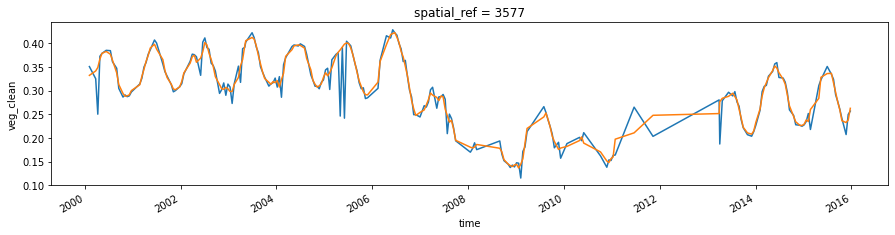

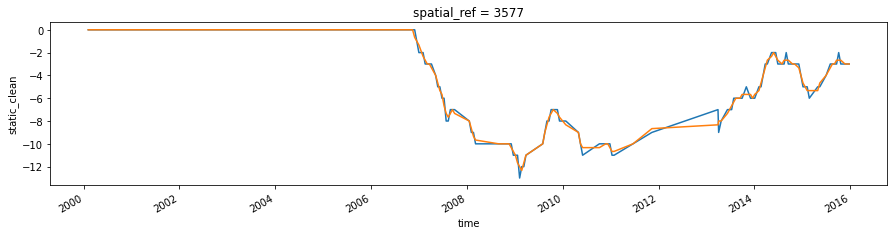

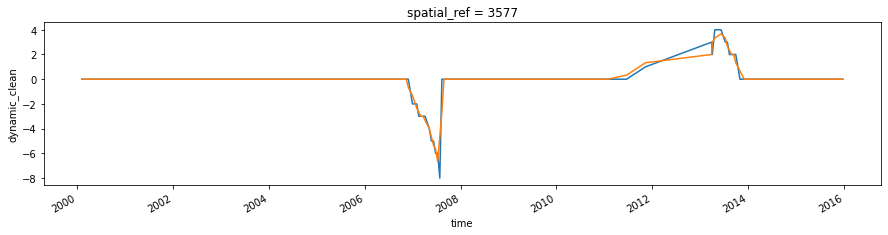

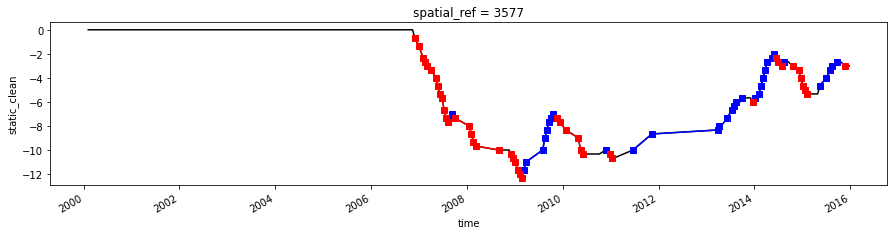

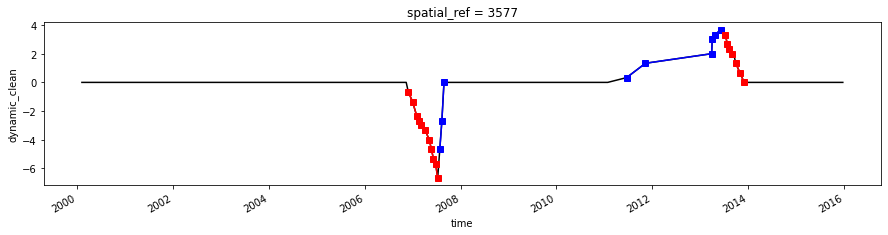

In [25]:
fig = plt.figure(figsize=[15, 3])
ds_tmp['veg_idx'].plot()
ds_tmp['veg_clean'].plot()
plt.show()

fig = plt.figure(figsize=[15, 3])
ds_tmp['static_raw'].plot()
ds_tmp['static_clean'].plot()
plt.show()

fig = plt.figure(figsize=[15, 3])
ds_tmp['dynamic_raw'].plot()
ds_tmp['dynamic_clean'].plot()
plt.show()

fig = plt.figure(figsize=[15, 3])
ds_tmp['static_clean'].plot(color='black')
ds_tmp['static_clean'].where(ds_tmp['static_rule_one'] > 0).plot(marker='s', color='blue')
ds_tmp['static_clean'].where(ds_tmp['static_rule_one'] < 0).plot(marker='s', color='red')
plt.show()

fig = plt.figure(figsize=[15, 3])
ds_tmp['dynamic_clean'].plot(color='black')
ds_tmp['dynamic_clean'].where(ds_tmp['dynamic_rule_one'] > 0).plot(marker='s', color='blue')
ds_tmp['dynamic_clean'].where(ds_tmp['dynamic_rule_one'] < 0).plot(marker='s', color='red')
plt.show()

In [7]:
ds = ds_tmp.copy(deep=True)
var = 'static_clean' #'static_clean'
min_consequtives = 0 #feat[6] # 2
inc_plateaus = feat[7] # no
#max_consequtives = 3
#final_reset=False

In [14]:
#def generate_ruleset_values(ds, inc_plateaus='No'):
#    """takes change da (i.e. clean static or dynamic)"""

# check dataset
if ds is None:
    raise ValueError('Dataset must not be none.') 
elif not isinstance(ds, xr.Dataset):
    raise TypeError('Dataset must be xr Dataset type.')
elif 'time' not in ds:
    raise ValueError('Time dimension not found in dataset.')
elif var not in ds:
    raise ValueError('Variable not found in dataset.')
    
# check rule parameters
#if direction not in ['incline', 'decline']:
    #raise ValueError('Direction must be incline or decline.')
#elif min_consequtives < 0 or min_consequtives > 999:
    #print('Minimum consequtives must be > 0 and < 999. Setting to default (2).')
    #min_consequtives = 2
# elif inc_plateaus not in ['Yes', 'No']:
    # inc_plateaus = 'No'
    
# prepare parameters
inc_plateaus = True if inc_plateaus == 'Yes' else False

# build static rule 1 conseqs +/- runs (all), dont threshold yet
ds_tmp['static_rule_one'] = xr.apply_ufunc(nrt.build_rule_one_runs,
                                           ds_tmp['static_clean'],
                                           input_core_dims=[['time']],
                                           output_core_dims=[['time']],
                                           vectorize=True,
                                           kwargs={'inc_plateaus': inc_plateaus})

# build dynamic rule 1 conseqs +/- runs (all), dont threshold yet
ds_tmp['dynamic_rule_one'] = xr.apply_ufunc(nrt.build_rule_one_runs,
                                            ds_tmp['dynamic_clean'],
                                            input_core_dims=[['time']],
                                            output_core_dims=[['time']],
                                            vectorize=True,
                                            kwargs={'inc_plateaus': inc_plateaus})



In [9]:
fig = plt.figure(figsize=[15, 5])
plt.plot(arr)
plt.plot(np.where(arr_runs > 0, arr, np.nan), marker='s', color='blue')
plt.plot(np.where(arr_runs < 0, arr, np.nan), marker='s', color='red')
plt.show()

NameError: name 'arr_runs' is not defined

In [11]:
ds_tmp['static_rule_one']

<xarray.DataArray 'static_rule_one' (time: 222)>
array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0., -1., -2., -3., -4., -5.,  0., -1., -2., -3.,
       -4., -5., -6., -7., -8.,  1.,  2., -1., -2., -3., -4., -5., -6.,
        0.,  0.,  0.,  0., -1., -2., -3., -4., -5., -6.,  1.,  2.,  3.,
        4.,  5.,  6.,  7.,  8., -1., -2., -3., -4., -5., -6.,  0.,  1.,
        0., -1., -2.,  0.,  1.,  2.,  3.,  4.,  0.,  1.,  2.,  3.,  4.,
        0.,  0.,  1.,  0.,  0., -1.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,
        8., -1., -2., -3.,  1.,  0.,  0., -1.,  0., -1., -2., -3., -4.,
       -5.,  0.,  0.,  1.,  2.,  3.,  4.,  0.,  1.,  0.,  0., -1.,  0.,
        0.])
Coordinates:
    spatial_ref  int32 3577
  * time         (time) datetime64[ns] 2000-02-06T01:49:38 ... 2015-12-24T01:...

In [81]:
# 
da = ds_tmp['static_clean']

# apply ufunc
arr = np.array(da)


# calculate rule 1 - consequtives. keep run values from  
arr_rule_one_cands = nrt.get_rule_one_candidates(arr, 
                                                 min_consequtives=3, 
                                                 inc_plateaus='No', 
                                                 keep_sign=True,
                                                 final_reset=False)

vec_chg_zones = nrt.reclassify_signal_to_zones(arr=da)

ds_tmp['static_con_dec'].data = arr_rule_one_cands
ds_tmp['static_con_dec'] = ds_tmp['static_con_dec'].where(ds_tmp['static_con_dec'] < 0, 0)

ds_tmp['static_zones'].data = vec_chg_zones
ds_tmp['static_zones'] = ds_tmp['static_zones'].where(ds_tmp['static_zones'] < -2, 0)
ds_tmp['static_zones'] = ds_tmp['static_zones'].where(ds_tmp['static_con_dec'] != 0, 0)